In [21]:
import numpy as np
import pandas as pd

In [22]:
hea_18 = pd.read_stata('ch18k_EN_1.0p.dta')
rel_18 = pd.read_stata('cr18k_EN_1.0p.dta')
soc_18 = pd.read_stata('cs18k_EN_1.0p.dta')
fam_18 = pd.read_stata('cf18k_EN_1.0p.dta')
wor_18 = pd.read_stata('cw18k_EN_2.0p.dta')
per_18 = pd.read_stata('cp18j_EN_1.0p.dta')
val_18 = pd.read_stata('cv18j_EN_1.0p.dta')
ass_18 = pd.read_stata('ca18f_EN_1.0p.dta')
inc_18 = pd.read_stata('ci18k_EN_2.0p.dta')
hou_18 = pd.read_stata('cd18k_EN_1.0p.dta')

In [23]:
#column combinators (replaces given columns with one containing their avg values)
def average_columns(df, *columns):
    new_column_name = columns[-1]
    
    try:
        selected_columns = list(columns[:-1])
        avg_col = df[selected_columns].astype(float).mean(axis=1)
        return pd.DataFrame({new_column_name: avg_col})
    except KeyError as e:
        print(f'KeyError: {e} not found in DataFrame columns.')
        return pd.DataFrame({new_column_name: np.nan})

#replaces given columns with one containing their sums (not working ;-())
def sum_columns(df, new_column, *columns):
    df[new_column] = df[columns].sum(axis=1)

Background variables:

1. geslacht to sex
2. leeftijd to age
3. lftdcat to age_cat
4. aantalhh to hhm_num
5. aantalki to hh_chi
6. burgstat to civ_sta
7. woning to dwe_typ
8. sted to urb_lvl (Urban character: Surrounding address density per km2 extremely urban 2,500 or more very 1,500 to 2,500 moderately 1,000 to 1,500 slightly 500 to 1,000 not less than 500) 
9. belbezig to pri_occ 
10. brutoink to mon_inc 
11. brutocat mon_inc_cat 12. brutohh_f to hh_inc 
13. oplzon to edu_lvl

In [24]:
'''
bgvar_18[bgvar_18.select_dtypes(include='category').columns] = bgvar_18[bgvar_18.select_dtypes(include='category').columns].apply(lambda col: col.astype('category').cat.codes)
bg_var_names = {'nomem_encr':'nomem_encr', 'geslacht':'sex','leeftijd':'age', 'lftdcat':'age_cat', 'aantalhh':'hhm_num', 'aantalki':'hh_chi', 'burgstat':'civ_sta', 'woning':'dwe_typ', 'sted':'urb_lvl',  'belbezig':'pri_occ', 'brutoink':'mon_inc', 'brutocat':'mon_inc_cat','brutohh_f':'hh_inc', 'oplzon':'edu_lvl'}
bg_var = bgvar_18.loc[:, list(bg_var_names.keys())].rename(columns=bg_var_names)
bg_var.head()
'''

"\nbgvar_18[bgvar_18.select_dtypes(include='category').columns] = bgvar_18[bgvar_18.select_dtypes(include='category').columns].apply(lambda col: col.astype('category').cat.codes)\nbg_var_names = {'nomem_encr':'nomem_encr', 'geslacht':'sex','leeftijd':'age', 'lftdcat':'age_cat', 'aantalhh':'hhm_num', 'aantalki':'hh_chi', 'burgstat':'civ_sta', 'woning':'dwe_typ', 'sted':'urb_lvl',  'belbezig':'pri_occ', 'brutoink':'mon_inc', 'brutocat':'mon_inc_cat','brutohh_f':'hh_inc', 'oplzon':'edu_lvl'}\nbg_var = bgvar_18.loc[:, list(bg_var_names.keys())].rename(columns=bg_var_names)\nbg_var.head()\n"

Concepts in Health:
1. **Subjective health** (ch22o004 to sub_hea)
2. **Relative health** (ch22o005 to rel_hea)
3. Life expectancy
4. **Mental health** (all neg as men_hea_neg and and all pos as men_hea_pos)
5. Height, weight
6. **Chronical problems** (ch22o018 to disability)
7. Health problems
8. Impediment in labour
9. **Substance use** (ch22o126 to smoker, ch22o133 to alcohol, all substances to subs)
10. Medication
11. Physical activity - only until 2018
12. Health improving behaviour - - only until 2018
13. Use of healthcare
14. Sight and hearing
15. Health insurance

In [25]:
#select categorical columns and convert to numeric
hea_18[hea_18.select_dtypes(include='category').columns] = hea_18[hea_18.select_dtypes(include='category').columns].apply(lambda col: col.astype('category').cat.codes)

#average for mental health and drugs
hea_toavg = [('ch18k011','ch18k014','ch18k012', 'men_hea_neg'),('ch18k013', 'ch18k015', 'men_hea_pos'), ('ch18k159', 'ch18k160', 'ch18k161', 'ch18k161', 'ch18k162', 'ch18k163', 'subs')]
hea_18 = pd.concat([hea_18] + [average_columns(hea_18, *column_set) for column_set in hea_toavg], axis=1)

#create a new df hea_18_con with selected columnns and new columns containing avgs (representing concepts)
hea_con = {'nomem_encr':'nomem_encr', 'ch18k004': 'sub_hea', 'ch18k005': 'rel_hea', 'ch18k018': 'disability', 'ch18k020':'mob_issues', 'ch18k126':'smoker', 'ch18k133':'alcohol', 'men_hea_neg':'men_hea_neg', 'men_hea_pos':'men_hea_pos', 'subs':'subs'}
hea_18_con = hea_18.loc[:, list(hea_con.keys())].rename(columns=hea_con)

#ready
hea_18_con.head()

,nomem_encr,sub_hea,rel_hea,disability,mob_issues,smoker,alcohol,men_hea_neg,men_hea_pos,subs
0,800009.0,1,1,0,2,1,0,0.000000,3.5,0.0
1,800015.0,2,2,0,0,-1,2,0.333333,3.5,0.0
2,800054.0,2,2,1,0,-1,1,0.000000,4.0,0.0
3,800057.0,3,2,1,0,1,1,0.000000,0.0,0.0
4,800073.0,2,2,1,1,0,0,0.000000,4.0,0.0


Concepts in Religion and Ethnicity:

1. **Religious upbringing** (cr23p135 to rel_upb)
2. **Religious affiliation** (cr23p144 to rel_aff)
3. **Religiosity** (cr23p162 to relig)
4. Religious orthodoxy
5. Nationality 
6. **Origin** (cr23p079 – cr23p087 to lang_ori, cr23p079 indicating Dutch or not)
7. **Ethnic identification** (cr23p164 to eth_id)
8. Language proficiency and use

In [26]:
#almost nothing exists here in 2018
rel_con = {'nomem_encr':'nomem_encr'}
rel_18[rel_18.select_dtypes(include='category').columns] = rel_18[rel_18.select_dtypes(include='category').columns].apply(lambda col: col.astype('category').cat.codes)
rel_18_con = rel_18.loc[:, list(rel_con.keys())].rename(columns=rel_con)
rel_18_con.head()

,nomem_encr
0,800009.0
1,800015.0
2,800057.0
3,800073.0
4,800085.0


Concepts in Social Intergation and Leisure:

1. Loneliness
2. Social contacts 
3. **Satisfaction leisure** (cs22o001 to lei_sat)
4. Social engagement
5. Volunteer aid
6. Time expenditure voluntary work
7. **Cultural participation** (sum cs22o494 - cs22o496 to cul_par)
8. **Holidays** (cs22o103 to ab_hol)
9. **Sport** (cs22o105 to spo_h)
10. Media usage

In [27]:
soc_18[soc_18.select_dtypes(include='category').columns] = soc_18[soc_18.select_dtypes(include='category').columns].apply(lambda col: col.astype('category').cat.codes)
#doesn't exist in 2018
#cultosum = ['cs22o495', 'cs22o517', 'cs22o093', 'cs22o094', 'cs22o568', 'cs22o516', 'cs22o496']
#soc_18['cul_sum'] = soc_18[cultosum].sum(axis=1)
#'cul_sum':'cul_par'
soc_con = {'nomem_encr':'nomem_encr','cs18k001':'lei_sat', 'cs18k103':'ab_hol', 'cs18k105':'spo_h'}
soc_18_con = soc_18.loc[:, list(soc_con.keys())].rename(columns=soc_con)
print(soc_18_con)

      nomem_encr  lei_sat  ab_hol  spo_h
0       800009.0       10       1    NaN
1       800015.0        8       1    NaN
2       800054.0       10       0    NaN
3       800057.0        4       4    3.0
4       800073.0        9       0    NaN
...          ...      ...     ...    ...
5572    899914.0        8       0    NaN
5573    899923.0        7       1    6.0
5574    899954.0        8       1    NaN
5575    899957.0        5       3    2.0
5576    899960.0        6       2    1.0

[5577 rows x 4 columns]


Concepts in Family and Household:

1. **Parental relations** (cf22o145+cf22o146 to par_int)
2. **Partnership** (cf22o025 to liv_tog)
3. Marriage
4. Marital history
5. **Children** (cf22o455 to chi_num, cf22o456 to chi1_bir)
6. **Partnership and childbirth intentions** (cf22o128 to chi_fut)
7. Infertility
8. Parental support
9. Parent support
10. Quality of relationship
11. Division of domestic tasks
12. Perceived burden domestic tasks
13. Perceived burden child care
14. Perceived fairness division tasks
15. Child education: Supervision
16. Childcare

In [28]:
fam_18[fam_18.select_dtypes(include='category').columns] = fam_18[fam_18.select_dtypes(include='category').columns].apply(lambda col: col.astype('category').cat.codes)
famtosum = ['cf18k143', 'cf18k144']
fam_18['fam_sum'] = fam_18[famtosum].sum(axis=1)
fam_con = {'nomem_encr':'nomem_encr', 'fam_sum':'par_int', 'cf18k025':'liv_tog', 'cf18k455':'chi_num', 'cf18k456':'chi1_bir', 'cf18k128':'chi_fut'}
fam_18_con = fam_18.loc[:, list(fam_con.keys())].rename(columns=fam_con)
print(fam_18_con)

      nomem_encr  par_int  liv_tog  chi_num  chi1_bir  chi_fut
0       800009.0       -2        0      3.0    1982.0       -1
1       800015.0        1        0      2.0    1994.0       -1
2       800054.0       -2       -1      2.0    1971.0       -1
3       800073.0       -2        0      NaN       NaN       -1
4       800100.0        2        0      NaN       NaN        0
...          ...      ...      ...      ...       ...      ...
5671    899914.0       -2        0      2.0    1978.0       -1
5672    899923.0        4        0      2.0    1993.0       -1
5673    899954.0       -2       -1      NaN       NaN       -1
5674    899957.0        0       -1      NaN       NaN        0
5675    899960.0        2        0      NaN       NaN        0

[5676 rows x 6 columns]


/var/folders/rc/7v4gm02n4dl8nxs5j8gsxyz80000gn/T/ipykernel_26052/2610235338.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fam_18['fam_sum'] = fam_18[famtosum].sum(axis=1)


Concepts in Work and Schooling:

1. Employment / activity status
2. Hours of paid work
3. **Characteristics current or last job** (cw22o136 to wor_min, cw22o140 to wor_nig, cw22o142 to wor_hom, cw22o402 to wor_sect)
4. Average pay job
5. Second jobs
6. Work aspirations
7. **Satisfaction** (cw22o128 to inc_sat)
8. **Employment conditions**
9. Commuting
10. Pensions
11. Non-working, non-pension
12. Job search
13. Satisfaction education
14. Highest qualification
15. Highest education
16. Qualifications for job
17. Education and training in last year

cw22o439 to chi_<8

In [29]:
wor_18[wor_18.select_dtypes(include='category').columns] = wor_18[wor_18.select_dtypes(include='category').columns].apply(lambda col: col.astype('category').cat.codes)
wor_con = {'nomem_encr':'nomem_encr', 'cw18k136':'wor_min', 'cw18k140':'wor_nig', 'cw18k142':'wor_hom', 'cw18k402':'wor_sect', 'cw18k128':'inc_sat', 'cw18k439':'chi_<8'}
wor_18_con = wor_18.loc[:, list(wor_con.keys())].rename(columns=wor_con)
print(wor_18_con)

      nomem_encr  wor_min  wor_nig  wor_hom  wor_sect  inc_sat  chi_<8
0       800009.0      NaN       -1       -1        -1       -1      -1
1       800015.0      5.0        1        0        10        7       1
2       800042.0     10.0        0        0        13        8       1
3       800054.0      NaN       -1       -1        -1       -1      -1
4       800057.0     30.0        1        0         9        7      -1
...          ...      ...      ...      ...       ...      ...     ...
5827    899923.0     20.0        0        3        10        5       1
5828    899954.0      NaN       -1       -1        -1       -1      -1
5829    899957.0      NaN       -1       -1         6        7      -1
5830    899960.0      NaN       -1       -1        -1       -1      -1
5831    899993.0      NaN       -1       -1        -1       -1      -1

[5832 rows x 7 columns]


Concepts in Personality:
1. Happiness
2. **Life satisfaction** (cp22n014-016 to life_satf, cp22n070-079 as self_est_pos or self_est_neg)
3. Big five personality
4. Survey attitude
5. Self esteem
6. Mood
7. Need to evaluate
8. **Value orientation** (cp22n100 to res, cp22n110 to ind, cp22n118 to fam_sec, cp22n119 to free, cp22n129 to comf_life, cp22n133 to soc_rec)
9. Inclusion of Others in the Self
10. Social desirability
11. Affects
12. Need for Cognition
13. **Social trust** (cp22n019 to trust )

In [30]:
per_18[per_18.select_dtypes(include='category').columns] = per_18[per_18.select_dtypes(include='category').columns].apply(lambda col: col.astype('category').cat.codes)

#averages for life satisfaction and self-esteem
per_toavg = [('cp18j014','cp18j015','cp18j016', 'cp18j017', 'cp18j018','life_satf'),('cp18j070', 'cp18j071', 'cp18j073', 'cp18j075', 'cp18j076', 'self_est_pos'), ('cp18j072', 'cp18j074', 'cp18j078', 'cp18j079', 'self_est_neg')]
per_18 = pd.concat([per_18] + [average_columns(per_18, *column_set) for column_set in per_toavg], axis=1)

#create a new df per_18_con with selected columnns and new columns containing avgs (representing concepts)
per_con = {'nomem_encr':'nomem_encr', 'cp18j110': 'ind','cp18j118': 'fam_sec','cp18j119': 'free', 'cp18j133': 'soc_rec', 'cp18j129': 'comf_life', 'cp18j019': 'trust', 'life_satf':'life_satf', 'self_est_pos':'self_est_pos', 'self_est_neg':'self_est_neg' }
per_18_con = per_18.loc[:, list(per_con.keys())].rename(columns=per_con)

#ready
per_18_con.head()

,nomem_encr,ind,fam_sec,free,soc_rec,comf_life,trust,life_satf,self_est_pos,self_est_neg
0,800009.0,-1,-1,-1,-1,-1,6,4.0,-1.0,-1.0
1,800015.0,-1,-1,-1,-1,-1,5,4.0,-1.0,-1.0
2,800042.0,5,6,5,5,6,5,4.6,4.6,0.0
3,800054.0,-1,-1,-1,-1,-1,6,4.0,-1.0,-1.0
4,800057.0,-1,-1,-1,-1,-1,7,5.0,-1.0,-1.0


Concepts in Values:
1. Beliefs about maternal employment
2. **Gender role attitudes** (cv22n113 to gend_roles)
3. Political position ethnic minorities *page not working*
4. Right wing attitudes *page not working*
5. **Attitude towards foreigners** (cv22n120 to nationalist)
6. Marriage attitudes
7. Family solidarity
8. Norm of having children
9. Work ethic
10. Conservatism
11. Economic conservatism

In [31]:
val_18[val_18.select_dtypes(include='category').columns] = val_18[val_18.select_dtypes(include='category').columns].apply(lambda col: col.astype('category').cat.codes)

#create a new df val_18_con with selected columnns and new columns containing avgs (representing concepts)
val_con = {'nomem_encr':'nomem_encr','cv18j113': 'gend_roles', 'cv18j120': 'nationalist'}
val_18_con = val_18.loc[:, list(val_con.keys())].rename(columns=val_con)

#ready
val_18_con.head()

,nomem_encr,gend_roles,nationalist
0,800009.0,0,2
1,800015.0,0,0
2,800042.0,0,2
3,800054.0,1,2
4,800057.0,0,2


Concepts in Economic Situtation: Assets:
1. **Assets** (ca22h008 to ass_own, ca22h023 to ass_val, ca22h012 to tot_bal)

In [32]:
ass_18['ca18f023'] = pd.to_numeric(ass_18['ca18f023'], errors='coerce')
ass_18[ass_18.select_dtypes(include='category').columns] = ass_18[ass_18.select_dtypes(include='category').columns].apply(lambda col: col.astype('category').cat.codes)
ass_con = {'nomem_encr':'nomem_encr', 'ca18f008':'ass_own','ca18f023':'ass_val', 'ca18f012':'tot_bal'}
ass_18_con = ass_18.loc[:, list(ass_con.keys())].rename(columns=ass_con)

ass_18_con.head()

,nomem_encr,ass_own,ass_val,tot_bal
0,800009.0,1,4000.0,4.540000e+03
1,800015.0,0,NaN,3.400000e+04
2,800054.0,0,NaN,NaN
3,800057.0,1,20000.0,1.000000e+10
4,800073.0,0,NaN,1.000000e+10


Concepts in Income: 
1. Subjective standard of living
2. Satisfaction income
3. Employment income / Earnings cj008
4. Self-employment income
5. Non-employment income: pension
6. Non-employment income: benefits
7. Non-employment income: other
8. Credit, debt, payments
9. **Total income** (ci22o226 to income)
10. **Financial/material well-being** (ci22o252 to fin_sit)
11. Financial expectations
12. Financial management
13. Material deprivation


In [33]:
inc_18[inc_18.select_dtypes(include='category').columns] = inc_18[inc_18.select_dtypes(include='category').columns].apply(lambda col: col.astype('category').cat.codes)

#create a new df per_18_con with selected columnns and new columns containing avgs (representing concepts)
inc_con = {'nomem_encr':'nomem_encr','ci18k226': 'income', 'ci18k252': 'fin_sit' }
inc_18_con = inc_18.loc[:, list(inc_con.keys())].rename(columns=inc_con)

#ready
inc_18_con.head()

,nomem_encr,income,fin_sit
0,800009.0,-1,3
1,800015.0,-1,3
2,800054.0,10,2
3,800073.0,0,2
4,800085.0,6,4


Concepts for Housing:
1. Satisfaction housing
2. Housing characteristics
3. Housing expenditure 
4. **Housing wealth** (cd22o025 to pur_price)

In [34]:
hou_18[hou_18.select_dtypes(include='category').columns] = hou_18[hou_18.select_dtypes(include='category').columns].apply(lambda col: col.astype('category').cat.codes)

hou_con = {'nomem_encr':'nomem_encr','cd18k025': 'pur_price'}
hou_18_con = hou_18.loc[:, list(hou_con.keys())].rename(columns=hou_con)
hou_18_con.head()

,nomem_encr,pur_price
0,800015.0,94463.0
1,800054.0,NaN
2,800057.0,605000.0
3,800073.0,NaN
4,800085.0,139000.0


In [35]:
#merge
all_18 = [fam_18_con, hea_18_con, per_18_con, soc_18_con, val_18_con, wor_18_con, inc_18_con, ass_18_con, hou_18_con]

merged_18 = all_18[0]

for all in all_18[1:]:
    merged_18 = pd.merge(merged_18, all, on='nomem_encr', how='inner')

In [36]:
merged_18.head()

,nomem_encr,par_int,liv_tog,chi_num,chi1_bir,chi_fut,sub_hea,rel_hea,disability,mob_issues,...,wor_hom,wor_sect,inc_sat,chi_<8,income,fin_sit,ass_own,ass_val,tot_bal,pur_price
0,800015.0,1,0,2.0,1994.0,-1,2,2,0,0,...,0,10,7,1,-1,3,0,NaN,3.400000e+04,94463.0
1,800054.0,-2,-1,2.0,1971.0,-1,2,2,1,0,...,-1,-1,-1,-1,10,2,0,NaN,NaN,NaN
2,800073.0,-2,0,NaN,NaN,-1,2,2,1,1,...,-1,-1,-1,-1,0,2,0,NaN,1.000000e+10,NaN
3,800161.0,1,0,1.0,2014.0,1,3,2,0,2,...,0,12,8,0,-1,4,1,25000.0,1.000000e+10,340000.0
4,800170.0,1,-1,3.0,1991.0,-1,2,1,0,2,...,0,12,1,1,-1,1,0,NaN,8.000000e+04,75000.0


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


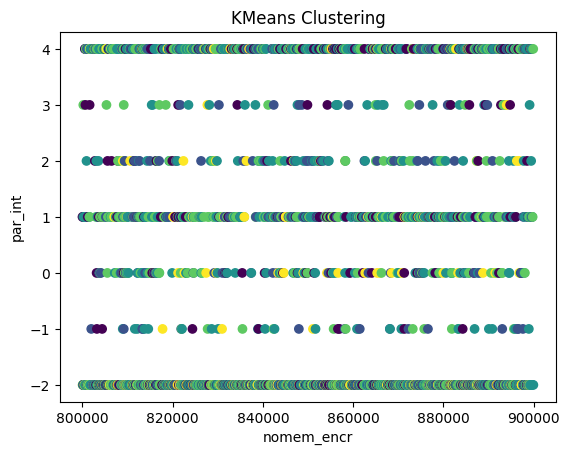

In [47]:
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Replace NaN values with the mean of each column
imputer = SimpleImputer(strategy='mean')
merged_18_imputed = pd.DataFrame(imputer.fit_transform(merged_18), columns=merged_18.columns)

#Means for clustering
n_clusters = 5  
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
labels = kmeans.fit_predict(merged_18_imputed)

#visualise over first to columns to
plt.scatter(merged_18_imputed.iloc[:, 0], merged_18_imputed.iloc[:, 1], c=labels, cmap='viridis')
plt.xlabel(merged_18_imputed.columns[0])
plt.ylabel(merged_18_imputed.columns[1])
plt.title('KMeans Clustering')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.1

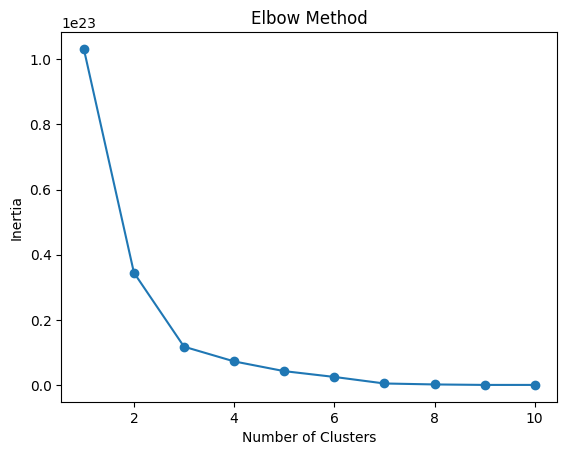

In [39]:
inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(merged_18_imputed)
    inertias.append(kmeans.inertia_)

plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.1

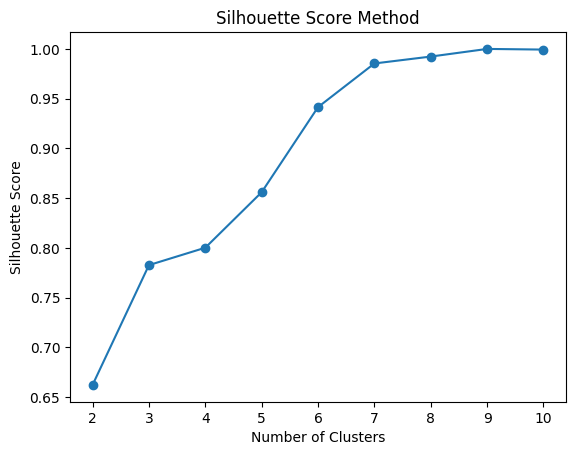

In [40]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(merged_18_imputed)
    silhouette_scores.append(silhouette_score(merged_18_imputed, labels))

plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Method')
plt.show()

Mean Squared Error: 0.0


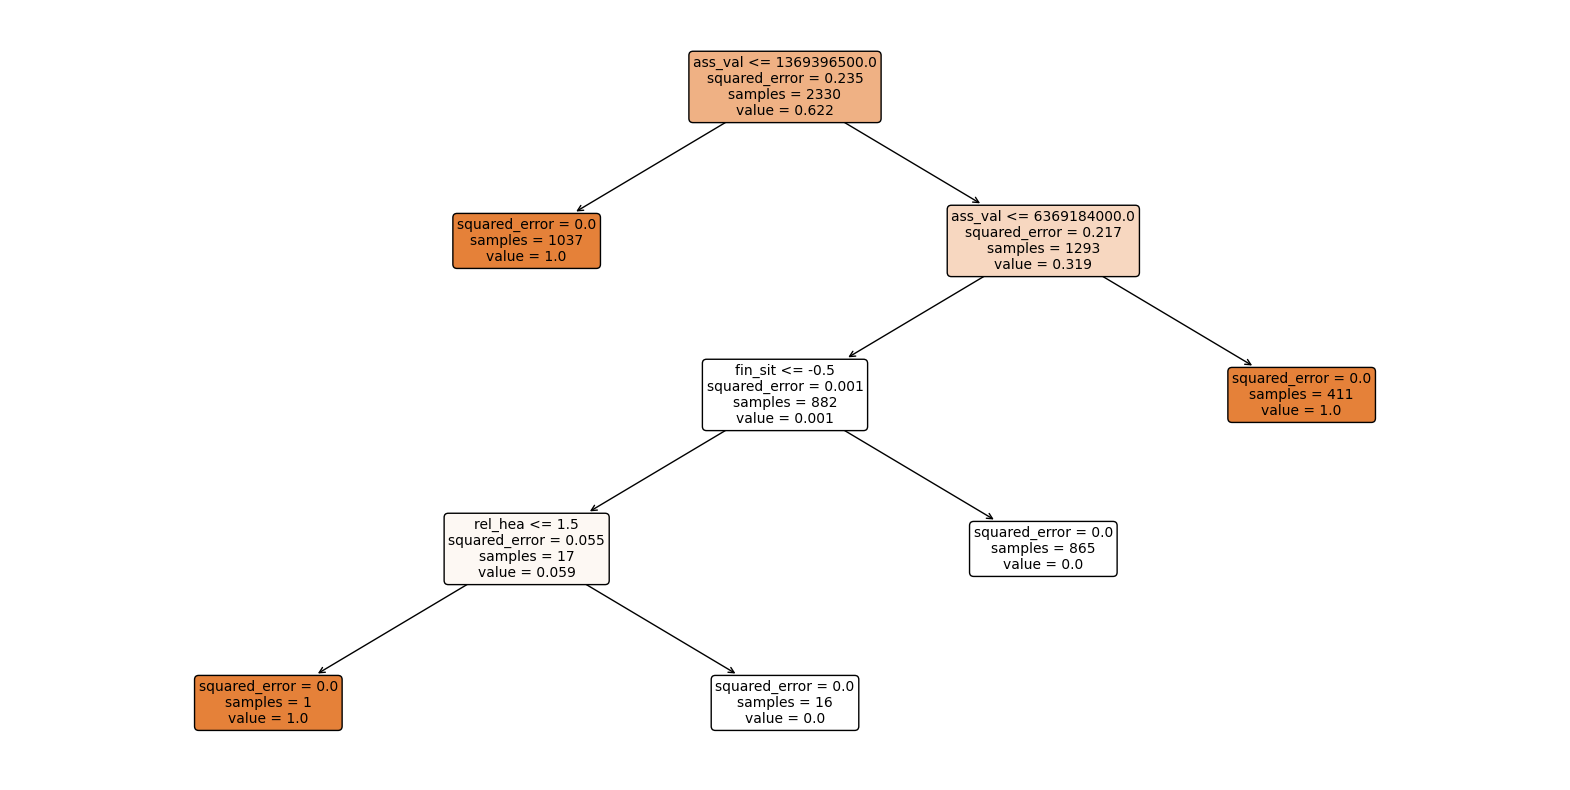

In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree


#replace NaN values with mean of column
imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(merged_18), columns=merged_18.columns)

#target variables
X = X_imputed.drop('ass_own', axis=1)
y = X_imputed['ass_own']

#split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#decision tree regressor
regressor = DecisionTreeRegressor(random_state=42)

regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

#evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

#visualize the tree
plt.figure(figsize=(20, 10))
plot_tree(regressor, filled=True, feature_names=X.columns, rounded=True, fontsize=10)
plt.show()
